In [9]:
import requests
import pandas as pd

In [10]:
salary_data_url = "https://api.dane.gov.pl/1.4/resources/38525,przecietne-miesieczne-wynagrodzenie-w-sektorze-przedsiebiorstw-dane-miesieczne?lang=pl"

In [12]:
response = requests.get(salary_data_url)
response.json()

{'jsonapi': {'version': '1.0'},
 'data': {'relationships': {'institution': {'data': {'id': '34',
     'type': 'institution'},
    'links': {'related': 'https://api.dane.gov.pl/1.4/institutions/34,glowny-urzad-statystyczny'}},
   'chart': {'data': {'id': '38525', 'type': 'chart'},
    'links': {'related': 'https://api.dane.gov.pl/1.4/resources/38525,przecietne-miesieczne-wynagrodzenie-w-sektorze-przedsiebiorstw-dane-miesieczne/chart'}},
   'dataset': {'data': {'id': '1766', 'type': 'dataset'},
    'links': {'related': 'https://api.dane.gov.pl/1.4/datasets/1766,wyrownania-sezonowe-przecietne-zatrudnienie-i-przecietne-miesieczne-wynagrodzenie'}},
   'tabular_data': {'data': {'id': '38525', 'type': 'tabular_data'},
    'links': {'related': 'https://api.dane.gov.pl/1.4/resources/38525/data'}}},
  'id': '38525',
  'type': 'resource',
  'attributes': {'visualization_types': ['table'],
   'csv_file_size': 14780,
   'views_count': 290,
   'jsonld_file_size': 262348,
   'modified': '2022-05-11T1

In [6]:
from pprint import pprint

In [7]:
pprint(response.json())

{'data': {'attributes': {'category': 'Praca i Pomoc Społeczna',
                         'created': '2022-05-11T10:47:58Z',
                         'csv_download_url': 'https://api.dane.gov.pl/resources/38525,przecietne-miesieczne-wynagrodzenie-w-sektorze-przedsiebiorstw-dane-miesieczne/csv',
                         'csv_file_size': 14780,
                         'csv_file_url': 'https://api.dane.gov.pl/media/resources/20220511/Przeci%C4%99tne_miesi%C4%99czne_wynagrodzenia_brutto_w_sektorze_przedsi%C4%99biorstw_-_dane_miesi%C4%99czne.csv',
                         'data_date': '2022-05-11',
                         'description': '<p>Dane miesięczne oraz dane '
                                        'kwartalne dotyczące przeciętnego '
                                        'miesięcznego wynagrodzenia w sektorze '
                                        'przedsiębiorstw są wyrównane sezonowo '
                                        'i dniami roboczymi.</p>',
                      

In [13]:
salary_csv_url = response.json()['data']['attributes']['csv_download_url']

In [14]:
pd.read_csv(salary_csv_url)

,Zmienna,Jednostka terytorialna,Jednostka,Rok,Miesiąc,Wartość
0,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2010,1,3358.40
1,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2010,2,3374.26
2,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2010,3,3403.03
3,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2010,4,3387.80
4,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2010,5,3431.09
...,...,...,...,...,...,...
142,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2021,11,6060.89
143,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2021,12,6202.86
144,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2022,1,6141.78
145,Przeciętne miesięczne wynagrodzenia brutto w s...,Polska,zł,2022,2,6304.29


In [15]:
salary_df = pd.read_csv(salary_csv_url)

In [16]:
salary_df = salary_df[['Rok', 'Miesiąc', 'Wartość']]

In [17]:
salary_df

,Rok,Miesiąc,Wartość
0,2010,1,3358.40
1,2010,2,3374.26
2,2010,3,3403.03
3,2010,4,3387.80
4,2010,5,3431.09
...,...,...,...
142,2021,11,6060.89
143,2021,12,6202.86
144,2022,1,6141.78
145,2022,2,6304.29


In [18]:
salary_df.columns = ['rok', 'miesiac','wartosc']

In [19]:
salary_df

,rok,miesiac,wartosc
0,2010,1,3358.40
1,2010,2,3374.26
2,2010,3,3403.03
3,2010,4,3387.80
4,2010,5,3431.09
...,...,...,...
142,2021,11,6060.89
143,2021,12,6202.86
144,2022,1,6141.78
145,2022,2,6304.29


In [20]:
salary_df.dtypes

rok          int64
miesiac      int64
wartosc    float64
dtype: object

In [21]:
salary_df.rok = salary_df.rok.astype(str) #zmiana typu na str

In [22]:
salary_df.miesiac = salary_df.miesiac.astype(str)

In [23]:
salary_df.dtypes

rok         object
miesiac     object
wartosc    float64
dtype: object

In [25]:
salary_df['okres'] = salary_df.rok + '-' + salary_df.miesiac

In [26]:
salary_df

,rok,miesiac,wartosc,okres
0,2010,1,3358.40,2010-1
1,2010,2,3374.26,2010-2
2,2010,3,3403.03,2010-3
3,2010,4,3387.80,2010-4
4,2010,5,3431.09,2010-5
...,...,...,...,...
142,2021,11,6060.89,2021-11
143,2021,12,6202.86,2021-12
144,2022,1,6141.78,2022-1
145,2022,2,6304.29,2022-2


<AxesSubplot:xlabel='okres'>

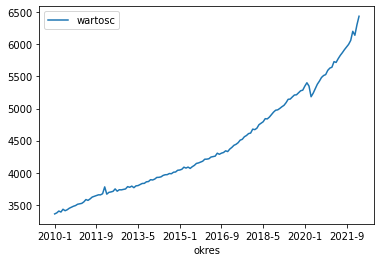

In [27]:
salary_df.plot(x='okres', y='wartosc')

In [28]:
import matplotlib.pyplot as plt

In [30]:
plt.style.use('ggplot')

<AxesSubplot:xlabel='okres'>

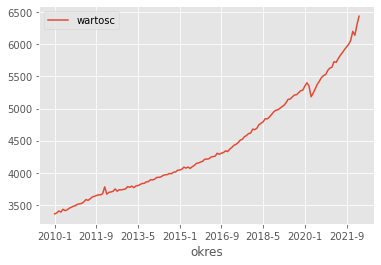

In [31]:
salary_df.plot(x='okres', y='wartosc')